# Fashion-MNIST Classification using KNN

### Dataset
First, let's load the dataset

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [ ]:
# load the whole dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# we only want the real training data to be split into development set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, shuffle=True, stratify=y_train_full)

4422102/4422102 [==============================] - 0s 0us/step


### Exploration
In this section, I have played around with the dataset to gain some insights into what it has and what it can be done with it, both numerically and visually.

In [ ]:
print(f"The type of training data for X and y: {type(X_train)}, {type(y_train)}")
print(f"The shape of X train = {X_train.shape}, of X val = {X_val.shape}")
print(f"The shape of y train = {y_train.shape}, of y val = {y_val.shape}")
print(f"The range of values in X train = [{X_train.min()}, {X_train.max()}]")

The type of training data for X and y: <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
The shape of X train = (48000, 28, 28), of X val = (12000, 28, 28)
The shape of y train = (48000,), of y val = (12000,)
The range of values in X train = [0, 255]


In [ ]:
# checking the classes and their counts
for i in range(len(np.unique(y_train))):
    print(f"There are {(y_train == i).sum()} from the {i}-th class")

There are 4800 from the 0-th class
There are 4800 from the 1-th class
There are 4800 from the 2-th class
There are 4800 from the 3-th class
There are 4800 from the 4-th class
There are 4800 from the 5-th class
There are 4800 from the 6-th class
There are 4800 from the 7-th class
There are 4800 from the 8-th class
There are 4800 from the 9-th class


### Visualization
The next couple of cells have plots that can give us some clues on what to expect from this dataset. They include:
- plot for a single sample
- plot for $n$ random samples
- class distribution plot (which proves to be unhelpful)
- random image grid for all classes
- pixel intensity distribution for a given sample
- same class samples

In [ ]:
# to visualize some samples
import matplotlib.pyplot as plt

#### Plot for a Single Sample

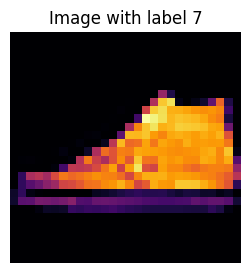

In [ ]:
idx = 10 # pick by index
image, label = X_train[idx], y_train[idx]

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap='inferno')
plt.title('Image with label {}'.format(label))
plt.axis('off')
plt.show()

#### Plot for $n$ Random Samples

In [ ]:
# plot a random image from a specified class
def plot_random_image(X, y, class_label, ax, color="gray"):
    num_samples_i = (y == class_label).sum()
    rand_idx = np.random.randint(low=0, high=num_samples_i)
    image, label = X[y == class_label][rand_idx], y[y == class_label][rand_idx]
    ax.imshow(image, cmap=color)
    ax.set_title('Class: {}'.format(label))
    ax.axis('off')

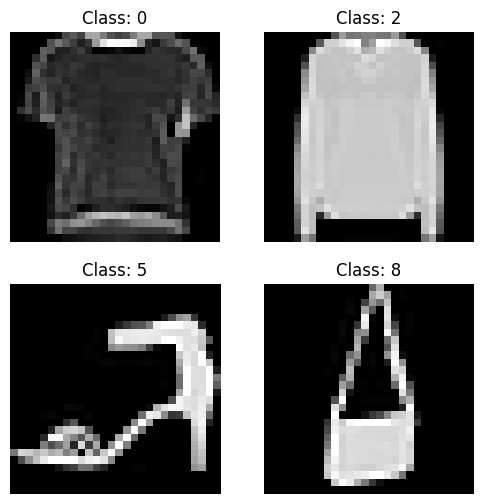

In [ ]:
# let's plot 4 random classes on the same plot
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

class_labels_to_plot = [0, 2, 5, 8]

for i in range(2):
    for j in range(2):
        class_label = class_labels_to_plot[i * 2 + j]
        plot_random_image(X_train, y_train, class_label, axs[i, j], "gist_gray")

plt.show()

#### Class Distribution Plot

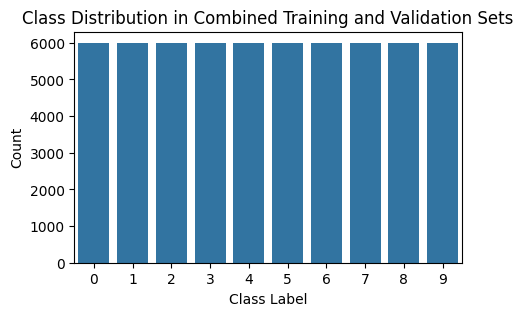

In [ ]:
import seaborn as sns

# combining training and validation sets for plotting (will not be used elsewhere)
combined_y = np.concatenate((y_train, y_val))

plt.figure(figsize=(5, 3))
sns.countplot(x=combined_y)
plt.title('Class Distribution in Combined Training and Validation Sets')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

> As we can see, all classes have the same exact number of items in them, which is 6,000 in total. Not much insight to collect here.

#### Random Image Grid for All Classes

In [ ]:
# plot a random image from a specified class
def plot_random_image_grid(X, y, class_labels, grid_size=(3, 4), color='gray'):
    fig, axs = plt.subplots(*grid_size, figsize=(10, 8))

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            class_idx = i * grid_size[1] + j
            if class_idx < len(class_labels):  # check if there are still classes to plot
                class_label = class_labels[class_idx]
                plot_random_image(X, y, class_label, axs[i, j], color)

    # remove empty subplots
    for i in range(len(class_labels), grid_size[0] * grid_size[1]):
        fig.delaxes(axs.flatten()[i])

    plt.show()

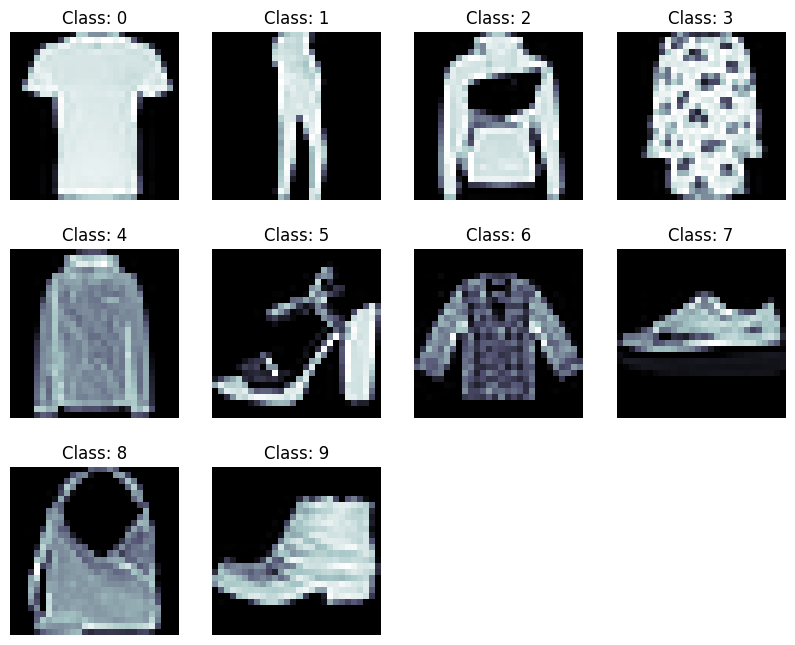

In [ ]:
# list of class labels
all_class_labels = [i for i in range(len(np.unique(y_test)))]

plot_random_image_grid(X_train, y_train, all_class_labels, grid_size=(3, 4), color="bone")
plt.show()

It is clear to see most of the classes and guess their labels, however, in order to avoid any confusions, here is the list of the official labels, which can be found on [Kaggle]():
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

#### Pixel Intensity Distribution

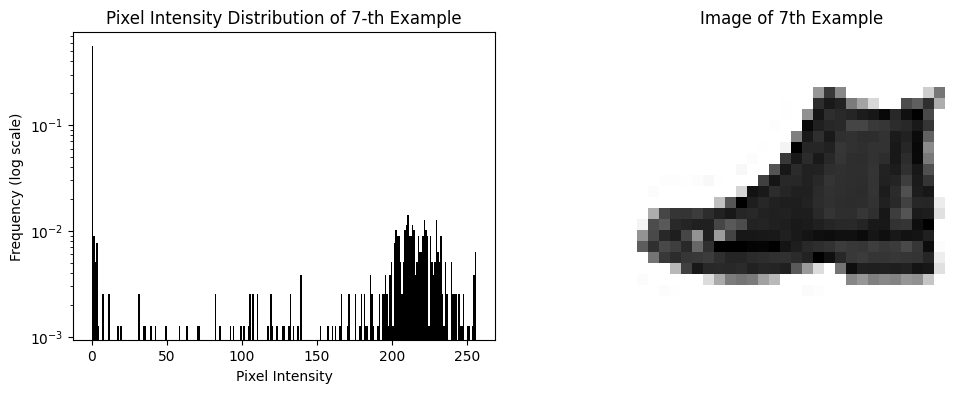

In [ ]:
idx = 6

# flat images are used for histogram
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# two subplots: pixel density and the actual image
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# pixel intensity distribution subplot
axs[0].hist(X_train_flat[idx], bins=256, range=(0, 256), density=True, color='black')
axs[0].set_title(f'Pixel Intensity Distribution of {idx+1}-th Example')
axs[0].set_xlabel('Pixel Intensity')
axs[0].set_ylabel('Frequency (log scale)')
axs[0].set_yscale('log')  # for better visualization

# image subplot
axs[1].imshow(X_train[idx], cmap='binary')
axs[1].set_title(f'Image of {idx+1}th Example')
axs[1].axis('off')

plt.show()

#### Same Class Samples

In [ ]:
def plot_same_class_samples(idx, color='gray'):
    # let's plot 4 samples from the same class
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))

    class_labels_to_plot = [idx] * 4

    for i in range(2):
        for j in range(2):
            class_label = class_labels_to_plot[i * 2 + j]
            plot_random_image(X_train, y_train, class_label, axs[i, j], color=color)

    plt.show()

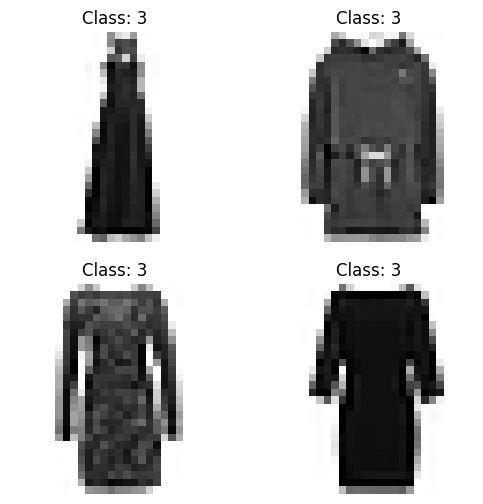

In [ ]:
plot_same_class_samples(3, "gist_yarg")

## Reshaping the Data

In [ ]:
# turn 3D into 2D
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [ ]:
print(f"X_train shape before flattening: {X_train.shape}")
print(f"X_train shape after flattening: {X_train_flat.shape}")

X_train shape before flattening: (48000, 28, 28)
X_train shape after flattening: (48000, 784)


## Building the KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Experimentation with Different $k$ Values

In [ ]:
# the list of k values to experiment with
k_values = [1, 3, 7, 12, 20, 30, 50, 75, 100]

# for storing the results per each k
validation_accuracies = []

for k in k_values:
    # initialize k-NN classifier with the current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # training
    knn_classifier.fit(X_train_flat, y_train)

    # prediction using the evaluation dataset (not the official test dataset)
    y_val_pred = knn_classifier.predict(X_val_flat)

    # get validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # store the validation accuracy for the current k
    validation_accuracies.append(val_accuracy)

    print(f"Validation Accuracy for k={k}: {val_accuracy}")

# find the optimal value of k
optimal_k = k_values[np.argmax(validation_accuracies)]
print(f"\nOptimal value of k: {optimal_k}")

Validation Accuracy for k=1: 0.8505
Validation Accuracy for k=3: 0.85625
Validation Accuracy for k=7: 0.8586666666666667
Validation Accuracy for k=12: 0.8533333333333334
Validation Accuracy for k=20: 0.84725
Validation Accuracy for k=30: 0.8434166666666667
Validation Accuracy for k=50: 0.8351666666666666
Validation Accuracy for k=75: 0.8281666666666667
Validation Accuracy for k=100: 0.81925

Optimal value of k: 7


### Validation Accurary Plot

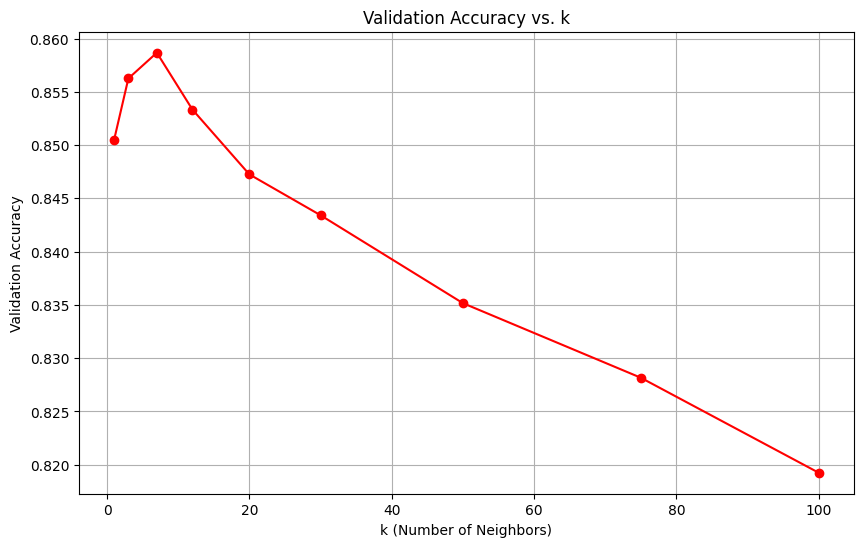

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, validation_accuracies, marker='o', linestyle='-', color='r')
plt.title('Validation Accuracy vs. k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

### The Best $k$ Value
So based on the outputs (both `optimal_k` and the plot), we can see that at $k=7$, we get the highest accuracy, which is **85.86**%.

## Combining Train and Validation Sets

In [ ]:
X_train_combined = np.concatenate((X_train_flat, X_val_flat))
y_train_combined = np.concatenate((y_train, y_val))

## Retraining Using Optimal $k$

In [ ]:
# initialize the classifier with the optimal value of k (which is 7)
optimal_knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)

# train on the combined data
optimal_knn_classifier.fit(X_train_combined, y_train_combined)

KNeighborsClassifier(n_neighbors=7)

## Assess Performance

In [ ]:
# predict labels
y_test_pred = optimal_knn_classifier.predict(X_test_flat)

# get test accuracy with the official test set of MNIST
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.854


## Results
As we can see, the classifier was able to predict with an accuracy of **85.4**% on the official test set of MNIST, which is fairly good.

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

### Generate the Matrix and Plot
Let us now create the confusion matrix for the final model's predictions across the ten classes.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[857   1  20  17   5   0  92   1   7   0]
 [  8 967   6  12   4   0   2   0   1   0]
 [ 20   2 814  11  78   0  75   0   0   0]
 [ 35   5  16 869  36   0  37   0   2   0]
 [  2   0 122  25 760   0  89   0   2   0]
 [  1   0   0   0   0 806   5 107   1  80]
 [173   0 129  23  74   0 588   0  13   0]
 [  0   0   0   0   0   2   0 957   0  41]
 [  1   1  13   5   7   0  12   7 952   2]
 [  0   0   0   0   0   1   1  28   0 970]]


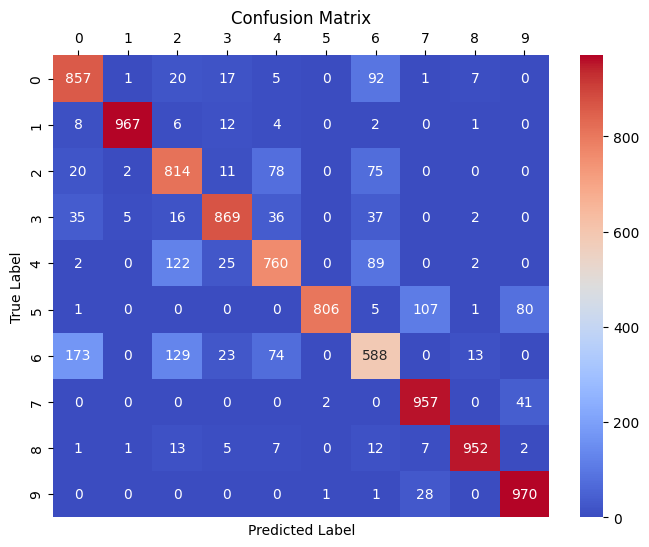

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)  # Adjust ticks
plt.ylabel('True Label')
plt.show()

## Insights
Before diving deep into the insights, I shall provide the names of each class to prevent any confusions:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

### Diagonal Elements (True Positives)
The main diagonal of the matrix (from top-left to bottom-right) represents the number of correctly classified instances for each class. Higher values on the diagonal are desirable. As we can see, for classes `1, 7, 8, 9` we are getting values well above **90**%. This means that these clothing items have been classified very accurately. The lowest belongs to class `6` with an accuracy of **58.8**%, which is still better than randomly guessing but perhaps not as high as we wanted it to be.

### Off-Diagonal Elements (Misclassifications)
Off-diagonal elements represent misclassifications. Higher values in off-diagonal elements indicate frequent misclassifications. For example, the prediction for class `0` with a true label of `6` has happened **173** times, which means that the model has falsely thought that the clothing item from class `0` is actually from class `6`, which makes sense once you see these two classes correspond to _"T-shirt/top"_ and _"Shirt"_ respectively.

### Class-wise Accuracy
Besides the classes `4, 6`, the rest have been predicted with a high accuracy. Class `4` has been predicted with a rate of **76**%, which is not low, but could be better. This class was seen similar to classes `2, 6` by the classifier the most, as _"Pullover"_ and _"Shirt"_ classes have good resemblence to _"Coat"_.

### Common Misclassifications
In the eye of the classifier, a few misclassifications were somewhat common:
1. misclassifying T-shirt/tops with Shirts
2. misclassifying Pullovers with Coats and Shirts

### Strong Predictions
For classes _"Trouser"_, _"Bag"_ and _"Anke Boot"_ classes, the model did an amazing job and only had few misclassifications. This might have to do with how unique these clothing items look and how much they differ from other classes in terms of their overall shapes and sizes.

### Something Strange
Interestingly enough, the model did not misclassify class `7` with `5` that much (only 2 instances). However, it did wrongly predict class `5` as `7` quite a number of times, **107** times actually. So it's interesting to see that the classifier thought sandals look like sneakers while it avoided treating sneakers as sandals. One would think the misclassification should go both ways, as we have seen with the shirts and T-shirts example, or the pullovers with the coats instances.




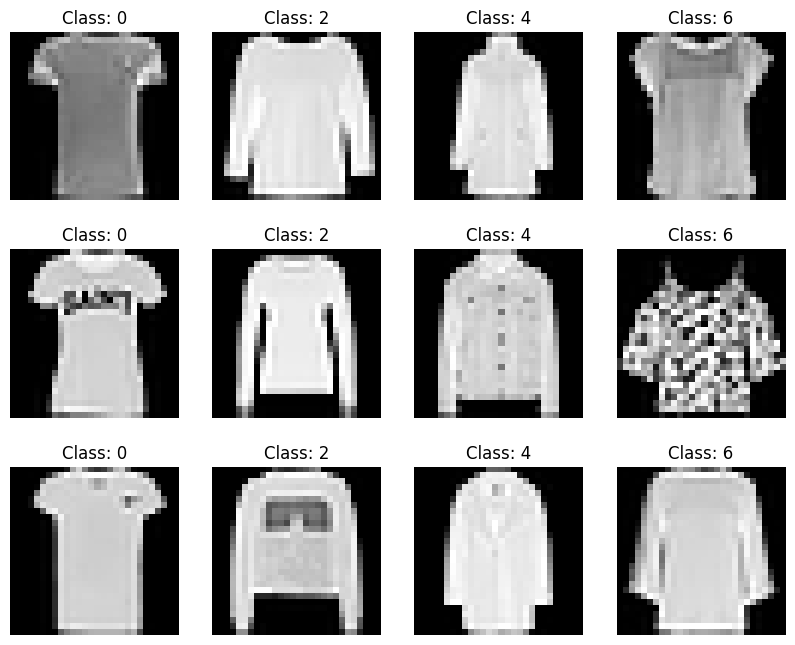

In [ ]:
common_misclass_labels = [0, 2, 4, 6]*4

plot_random_image_grid(X_train, y_train, common_misclass_labels)
plt.show()

As you can see, it is understandable why the model misclassified these items, as they are fairly similar in terms of overall look.

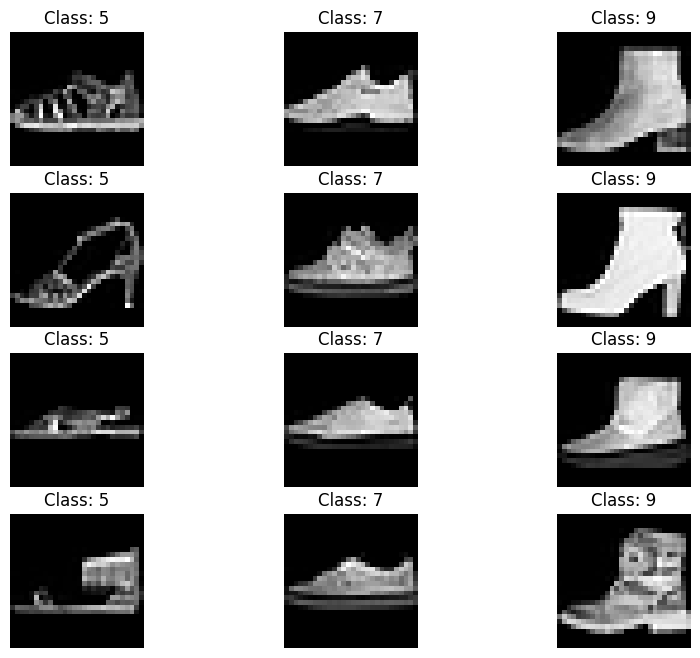

In [ ]:
strange_misclass_labels = [5, 7, 9]*4

plot_random_image_grid(X_train, y_train, strange_misclass_labels, grid_size=(4, 3))
plt.show()

Once again, we can see how some of the sandals, sneakers and perhaps ankle boots can look fairly similar. It is interesting that sandals have been misclassified as ankle boots **80** times, while the reverse (ankle boots being identified as sandals) only **once**. This is quite interesting considering how the model can predict better on closely-related classes in a one-way manner.

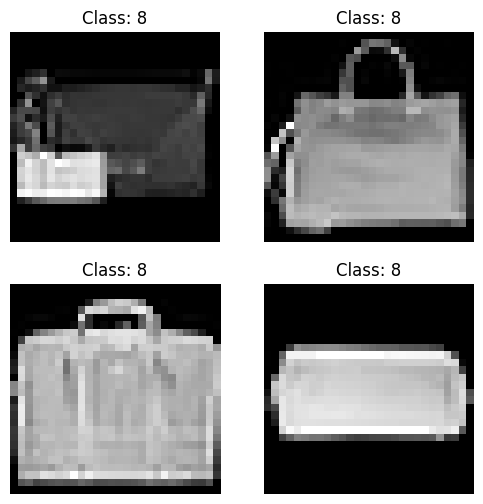

In [ ]:
# let's see how bags (class 8) look
plot_same_class_samples(8, "gist_gray")

Clearly, bags are quite unique in their appearance, hence being correctly labeled **95.2**% of the times.

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

# precision, recall, and F1-score for each class
class_report = classification_report(y_test, y_test_pred, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.81      0.77      1000
           3       0.90      0.87      0.89      1000
           4       0.79      0.76      0.77      1000
           5       1.00      0.81      0.89      1000
           6       0.65      0.59      0.62      1000
           7       0.87      0.96      0.91      1000
           8       0.97      0.95      0.96      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



## Hyperparamter Tuning
Thus far, we have only played with the values of $k$, let's now apply Min-Max scaling to the features and then use Principal Component Analysis (PCA) for dimensionality reduction. Perhaps our prediction score would increase by doing so.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
# do everything again to avoid past data to influence our experiment
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# flatten the images
X_train_flat = X_train_full.reshape(X_train_full.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# scale features from [0, 255] to [0, 1] using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# apply PCA for dimensionality reduction
n_components = 30
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# split the data into training and validation sets
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_train_pca, y_train_full, test_size=0.2, random_state=85, shuffle=True, stratify=y_train_full)

# train the classifier
k_value = 7  # the optimal k-value we found
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train_pca, y_train)

# predict using the validation set
y_val_pred = knn_classifier.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

# predict on the test set
y_test_pred = knn_classifier.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.85375
Test Accuracy: 0.8509


As we can see, the test accuracy is now **85.09**%, which is actually lower than what we originally had, which was **85.40**%. Therefore, the scaling and dimentionality reduction did not help as much.

### Changing the Distance Measure
By default, scikit-learn's `KNeighborsClassifier` uses the Euclidean distance measure. The Euclidean distance formula between two points $\left( a_1, a_2, \ldots , a_n \right)$ and $\left( b_1, b_2, \ldots , b_n \right)$ in an $n$-dimensional space is:
$$
D \left( p_1, p_2 \right) = \sqrt {\sum_{i=1}^{n} \left( p_{1_i} - p_{2_i} \right)^{2}}
$$

Where:
- $p_1$ and $p_2$ are the two points.
- $n$ is the number of dimensions.
- $p_{1_i}$ and $p_{2_i}$ are the data of the two points at the $i$-th dimension.


However, we can try other distance measures to see if they have an impact on the model's performance. Let's use the Manhattan distance (L1 norm) and see how it works. The formula for Manhattan distance is:
$$
D \left( p_1, p_2 \right) = \sum_{i=1}^{n} | p_{1_i} - p_{2_i} |
$$

In [ ]:
# train the classifier with Manhattan distance
knn_classifier_manhattan = KNeighborsClassifier(n_neighbors=k_value, p=1)  # p=1 specifies Manhattan distance
knn_classifier_manhattan.fit(X_train_pca, y_train)

y_test_pred_manhattan = knn_classifier_manhattan.predict(X_test_pca)
test_accuracy_manhattan = accuracy_score(y_test, y_test_pred_manhattan)
print(f"Test Accuracy with Manhattan distance: {test_accuracy_manhattan}")

Test Accuracy with Manhattan distance: 0.8486


As we can see, the new accuracy is **84.86**%, which is once again lower than our original classifier's accuracy. So let's try Minkowski distance measure, which is generalization of Euclidean and Manhattan. The formula for the Minkowski distance is:
$$
D \left( p_1, p_2 \right) = \left( \sum_{i=1}^{n} | p_{1_i} - p_{2_i} | ^{p} \right) ^{1/p}
$$

where $p$ is a positive real number, which determines the order of the Minkowski distance. If $p=1$, it becomes the Manhattan distance, and if $p=2$, it becomes the Euclidean distance.

In [ ]:
p_value = 3 # needs experimentation
knn_classifier_minkowski = KNeighborsClassifier(n_neighbors=k_value, p=p_value)
knn_classifier_minkowski.fit(X_train_pca, y_train)

# Make predictions on the test set
y_test_pred_minkowski = knn_classifier_minkowski.predict(X_test_pca)

# Print accuracy on the test set
test_accuracy_minkowski = accuracy_score(y_test, y_test_pred_minkowski)
print(f"Test Accuracy with Minkowski distance (p={p_value}): {test_accuracy_minkowski}")

Test Accuracy with Minkowski distance (p=3): 0.8463


With $p=3$ for the Minkowski distance, we got **84.63**% as our prediction score. Once again, this number is lower than our original prediction.

# Conclusion
Given the different techniques we have tried, it is safe to say that our original classifier, where $k=7$ and the distance measure was Euclidean (it was set to default) was the best classifier we could come up with.

I hope you enjoyed!